<a href="https://colab.research.google.com/github/BojanPLOJ/Bipropagation/blob/master/IrisBojan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Kopirano z naslova:

https://www.kdnuggets.com/2020/07/getting-started-tensorflow2.html

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
from sklearn.model_selection import train_test_split #to split data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [3]:
X = pd.DataFrame(data = iris.data, columns = iris.feature_names)
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
y = pd.DataFrame(data=iris.target, columns = ['irisType'])
y.head()

,irisType
0,0
1,0
2,0
3,0
4,0


In [5]:
y.irisType.value_counts()


2    50
1    50
0    50
Name: irisType, dtype: int64

In [6]:

iris.target_names #it is a key of dictionary iris

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [8]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_train[:5,:]

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [9]:
X_train = X_train.values

X_test = X_test.values


In [10]:
X_train[0]

array([5.8, 4. , 1.2, 0.2])

In [11]:
y_train[0]

array([1., 0., 0.], dtype=float32)

In [12]:
model1 = Sequential() #Sequential Object

In [13]:
model1.add( Dense( 4, activation = 'sigmoid', input_shape= X_train[1].shape))
model1.add( Dense ( 100, activation = 'relu'))
model1.add( Dense ( 100, activation = 'relu'))
model1.add( Dense ( 3, activation = 'softmax'))

In [14]:
model1.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics = ['acc'])

In [16]:
history = model1.fit(X_train, y_train, batch_size = 1, epochs=80, validation_split = 0.5)


Epoch 1/80
67/67 [==============================] - 0s 3ms/step - loss: 0.0766 - acc: 0.9701 - val_loss: 0.0643 - val_acc: 0.9706
Epoch 2/80
67/67 [==============================] - 0s 2ms/step - loss: 0.0679 - acc: 0.9701 - val_loss: 0.0717 - val_acc: 0.9853
Epoch 3/80
67/67 [==============================] - 0s 3ms/step - loss: 0.0600 - acc: 0.9552 - val_loss: 0.0652 - val_acc: 0.9706
Epoch 4/80
67/67 [==============================] - 0s 2ms/step - loss: 0.0605 - acc: 0.9701 - val_loss: 0.0676 - val_acc: 0.9853
Epoch 5/80
67/67 [==============================] - 0s 2ms/step - loss: 0.0866 - acc: 0.9701 - val_loss: 0.0674 - val_acc: 0.9853
Epoch 6/80
67/67 [==============================] - 0s 2ms/step - loss: 0.0900 - acc: 0.9701 - val_loss: 0.0638 - val_acc: 0.9706
Epoch 7/80
67/67 [==============================] - 0s 2ms/step - loss: 0.1401 - acc: 0.9403 - val_loss: 0.0664 - val_acc: 0.9706
Epoch 8/80
67/67 [==============================] - 0s 2ms/step - loss: 0.0488 - acc: 0.98

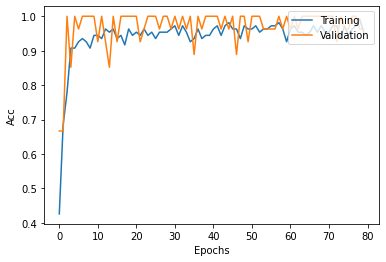

In [ ]:
plt.plot(history.history['acc'])

plt.plot(history.history['val_acc'])

plt.xlabel('Epochs')

plt.ylabel('Acc')

plt.legend(['Training', 'Validation'], loc='upper right')